# Sprint 機械学習スクラッチ SVM

class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 $\lambda$ を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
λ
n
e
w
i
=
λ
i
+
α
(
1
−
n
∑
j
=
1
-
λ
j
y
i
y
j
k
(
x
i
,
x
j
)
)
$$

ここで $k(x_i, x_j)$ はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

$$
k
(
x
i
,
x
j
)
=
x
T
i
x
j
$$

条件として、更新毎に $\lambda_i >= 0$を満たす必要があります。満たさない場合は $\lambda_i = 0$とします。


$i, j$ : サンプルのインデックス


$\lambda_i^{new}$ : 更新後のi番目のサンプルのラグランジュ乗数


$\lambda_i$ : 更新前のi番目のサンプルのラグランジュ乗数


$\alpha$ : 学習率


$\lambda_j$ : j番目のサンプルのラグランジュ乗数


$y_i$ : i番目のサンプルのラベル


$y_j$ : j番目のサンプルのラベル


$x_i$ : i番目のサンプルの特徴量ベクトル


$x_j$ : j番目のサンプルの特徴量ベクトル


あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。



In [57]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # ラムダ{i, j}の初期値の設定
        np.random.seed(0)
        self.lamda_i_arr = np.random.random(X.shape[0])
        self.lamda_j = np.random.rand(X.shape[0])
                
        self.X, self.y, self.X_val, self.y_val = self._setting(X, y, X_val, y_val)       
                
        for i in range(self.iter):
            self.lam_sv = self._lagrange_func(self.X, self.y)   # ラムダ更新 #サポートベクターの未定乗数
            self.index_support_vectors = np.where(self.lam_sv > self.threshold)[0] #サポートベクターのインデックス
           
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("[iter{}]ラムダ:{}". format(i), self.lam_sv)
                print("[iter{}]サポートベクターの数:{}".format(i, len(self.index_support_vectors)))

        
        self.X_sv = self.X[self.index_support_vectors]  #サポートベクターの特徴量
        self.y_sv = self.y[self.index_support_vectors]  #サポートベクターのラベル
        self.lam_sv = np.delete(self.lam_sv, np.where(self.lam_sv == 0)[0])   # ラムダ内「0」を削除
                           
    def _setting(self, X, y, X_val, y_val):                   
        X_copy = np.copy(X)
        y_copy = np.copy(y)
        
        if X_val is not None and y_val is not None:
            X_val_copy = np.copy(X_val)
            y_val_copy = np.copy(y_val)
        else:
            X_val_copy = X_val
            y_val_copy = y_val

        return X_copy, y_copy, X_val_copy, y_val_copy

    # 問題3
    # 推定
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        karnel_Xsv = self._karnel_func(X, self.X_sv)   #X：testデータ #self.X：trainデータ      
        Xy_sv = self.y_sv * karnel_Xsv       
        pred = np.dot(Xy_sv, self.lam_sv)
        
        # −1.1に変換する
        pred = np.where(pred < 0, -1 , 1).astype(int)
        
        return pred
    
    # 問題1
    # カーネル関数
    def _karnel_func(self, array1, array2=None):
        """
        カーネル関数
        
        Parameters
        ------------
        array：行列の
        
        Returns
        
        """
        if array2 is not None:
            return np.dot(array1, array2.T)
        else:
            return np.dot(array1, array1.T)

    # 問題2
    # ラグランジュ関数    
    def _lagrange_func(self, X, y):
        """
        ラグランジュの未定乗数法
        
        Parameters
        ------------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        
        Returns        
        """        
        if X.ndim == 1:
            X.reshape(-1, 1)
        
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        
        karnel_X = self._karnel_func(X)
        karnel_y = self._karnel_func(y)
        #print(karnel_X, "111")
        #print(karnel_y, "222")
        
        XY = karnel_X * karnel_y
        #print(XY, "XY")
        
        sigma = self.lr*(1- np.dot(XY, self.lamda_j.T))
        
        for i in range(X.shape[0]):
            self.lamda_i_arr[i] = self.lamda_i_arr[i] + sigma[i]
            
        self.lamda_i_arr = np.where(self.lamda_i_arr < 0, 0, self.lamda_i_arr) #0以下の値を0に置換
        
        return self.lamda_i_arr

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



In [63]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [64]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test =  train_test_split(X, y, test_size=0.25, random_state=0)

print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(375, 2)
(125, 2)
(375,)
(125,)


In [104]:
model3 = ScratchSVMClassifier(num_iter=1200, 
                              lr= 0.000001,
                              kernel='linear', 
                              threshold=1e-5, 
                              verbose=False)

model3.fit(X3_train, y3_train)

(375,)
(375,)
[iter0]サポートベクターの数:375
[iter1]サポートベクターの数:375
[iter2]サポートベクターの数:375
[iter3]サポートベクターの数:375
[iter4]サポートベクターの数:375
[iter5]サポートベクターの数:374
[iter6]サポートベクターの数:374
[iter7]サポートベクターの数:374
[iter8]サポートベクターの数:374
[iter9]サポートベクターの数:374
[iter10]サポートベクターの数:374
[iter11]サポートベクターの数:373
[iter12]サポートベクターの数:373
[iter13]サポートベクターの数:373
[iter14]サポートベクターの数:373
[iter15]サポートベクターの数:373
[iter16]サポートベクターの数:372
[iter17]サポートベクターの数:371
[iter18]サポートベクターの数:371
[iter19]サポートベクターの数:371
[iter20]サポートベクターの数:371
[iter21]サポートベクターの数:371
[iter22]サポートベクターの数:371
[iter23]サポートベクターの数:371
[iter24]サポートベクターの数:371
[iter25]サポートベクターの数:371
[iter26]サポートベクターの数:370
[iter27]サポートベクターの数:367
[iter28]サポートベクターの数:366
[iter29]サポートベクターの数:366
[iter30]サポートベクターの数:365
[iter31]サポートベクターの数:364
[iter32]サポートベクターの数:364
[iter33]サポートベクターの数:364
[iter34]サポートベクターの数:363
[iter35]サポートベクターの数:363
[iter36]サポートベクターの数:363
[iter37]サポートベクターの数:363
[iter38]サポートベクターの数:363
[iter39]サポートベクターの数:363
[iter40]サポートベクターの数:363
[iter41]サポートベクターの数:363
[iter42]サポートベクターの数:362
[iter43

[iter389]サポートベクターの数:249
[iter390]サポートベクターの数:249
[iter391]サポートベクターの数:248
[iter392]サポートベクターの数:248
[iter393]サポートベクターの数:248
[iter394]サポートベクターの数:247
[iter395]サポートベクターの数:246
[iter396]サポートベクターの数:246
[iter397]サポートベクターの数:245
[iter398]サポートベクターの数:244
[iter399]サポートベクターの数:244
[iter400]サポートベクターの数:244
[iter401]サポートベクターの数:243
[iter402]サポートベクターの数:242
[iter403]サポートベクターの数:242
[iter404]サポートベクターの数:242
[iter405]サポートベクターの数:242
[iter406]サポートベクターの数:242
[iter407]サポートベクターの数:241
[iter408]サポートベクターの数:241
[iter409]サポートベクターの数:241
[iter410]サポートベクターの数:241
[iter411]サポートベクターの数:241
[iter412]サポートベクターの数:239
[iter413]サポートベクターの数:239
[iter414]サポートベクターの数:238
[iter415]サポートベクターの数:238
[iter416]サポートベクターの数:237
[iter417]サポートベクターの数:237
[iter418]サポートベクターの数:237
[iter419]サポートベクターの数:237
[iter420]サポートベクターの数:237
[iter421]サポートベクターの数:237
[iter422]サポートベクターの数:237
[iter423]サポートベクターの数:236
[iter424]サポートベクターの数:236
[iter425]サポートベクターの数:236
[iter426]サポートベクターの数:235
[iter427]サポートベクターの数:234
[iter428]サポートベクターの数:233
[iter429]サポートベクターの数:233
[iter430]サポートベクタ

[iter801]サポートベクターの数:127
[iter802]サポートベクターの数:126
[iter803]サポートベクターの数:125
[iter804]サポートベクターの数:125
[iter805]サポートベクターの数:125
[iter806]サポートベクターの数:124
[iter807]サポートベクターの数:122
[iter808]サポートベクターの数:122
[iter809]サポートベクターの数:122
[iter810]サポートベクターの数:122
[iter811]サポートベクターの数:122
[iter812]サポートベクターの数:122
[iter813]サポートベクターの数:122
[iter814]サポートベクターの数:122
[iter815]サポートベクターの数:122
[iter816]サポートベクターの数:122
[iter817]サポートベクターの数:121
[iter818]サポートベクターの数:120
[iter819]サポートベクターの数:120
[iter820]サポートベクターの数:120
[iter821]サポートベクターの数:119
[iter822]サポートベクターの数:119
[iter823]サポートベクターの数:119
[iter824]サポートベクターの数:119
[iter825]サポートベクターの数:118
[iter826]サポートベクターの数:116
[iter827]サポートベクターの数:116
[iter828]サポートベクターの数:115
[iter829]サポートベクターの数:115
[iter830]サポートベクターの数:115
[iter831]サポートベクターの数:114
[iter832]サポートベクターの数:113
[iter833]サポートベクターの数:111
[iter834]サポートベクターの数:111
[iter835]サポートベクターの数:111
[iter836]サポートベクターの数:110
[iter837]サポートベクターの数:109
[iter838]サポートベクターの数:109
[iter839]サポートベクターの数:109
[iter840]サポートベクターの数:109
[iter841]サポートベクターの数:108
[iter842]サポートベクタ

[iter1193]サポートベクターの数:26
[iter1194]サポートベクターの数:26
[iter1195]サポートベクターの数:26
[iter1196]サポートベクターの数:26
[iter1197]サポートベクターの数:26
[iter1198]サポートベクターの数:26
[iter1199]サポートベクターの数:25
[[ 1.00671761 -0.89541611]
 [ 0.23534918  2.307901  ]
 [ 0.66831964 -1.49110721]
 [-0.48233379  2.03605625]
 [-2.0764856   0.48746845]
 [ 1.03842491 -0.88881567]
 [ 2.06497072 -0.65333785]
 [-1.76320579 -0.07237927]
 [ 1.17922837 -0.71861112]
 [-0.5690418   1.92015645]
 [ 1.74948383 -0.29028349]
 [ 0.30006142  2.83794023]
 [ 1.68094977 -0.63650755]
 [ 0.31731679  2.22551981]
 [ 1.34670812 -0.77471924]
 [ 1.28107479 -0.21320964]
 [-0.97854994  0.34188908]
 [ 1.98902294 -0.84735041]
 [-1.09595569  0.88139151]
 [ 2.10157755  0.16531826]
 [-1.35919625  0.89205189]
 [ 0.89963795  3.59734065]
 [ 1.46316117  3.81647106]
 [-1.00944756  1.29523033]
 [ 1.49215226 -0.51536082]] 111
[-1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1
 -1] 222
[0.32949795 0.19419699 0.09781133 0.17007132 0.04562255 0.02413104
 0.

In [77]:
model3.predict(X3_test)

array([-1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1])

In [78]:
# sklearn SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

svc = SVC()
svc.fit(X3_train, y3_train)
svc_pred = svc.predict(X3_test)
svc_result = [accuracy_score(y3_test, svc_pred), precision_score(y3_test, svc_pred), recall_score(y3_test, svc_pred), f1_score(y3_test, svc_pred)]

print("▼SVM")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(svc_result[0], svc_result[1], svc_result[2], svc_result[3]))

▼SVM
正答率(accuracy_score):1.00, 適合率(precision):1.00, 再現率(Recall):1.00, F値:1.00


In [79]:
scr_pred = model3.predict(X3_test)
model3.result = [accuracy_score(y3_test, scr_pred), precision_score(y3_test, scr_pred), recall_score(y3_test, scr_pred), f1_score(y3_test, scr_pred)]

In [80]:
print("▼Scratch")
print("正答率(accuracy_score):{:.2f}, 適合率(precision):{:.2f}, 再現率(Recall):{:.2f}, F値:{:.2f}"
      .format(scr_result[0], scr_result[1], scr_result[2], scr_result[3]))

▼Scratch
正答率(accuracy_score):1.00, 適合率(precision):1.00, 再現率(Recall):0.00, F値:1.00


In [97]:
comparison_df = pd.DataFrame({"Scratch": scr_pred, "sklearn": svc_pred})
comparison_df

,Scratch,sklearn
0,-1,-1
1,1,1
2,1,1
3,-1,-1
4,-1,-1
5,1,1
6,1,1
7,-1,-1
8,-1,-1
9,1,1


## 比較をみても予測はしっかりとできていそう

## 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [128]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='f0', ylabel='f1', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスタンスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]    
    #print(mesh)
    #print(mesh.shape)
    
    #print(model.predict(mesh))
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    #print(y_pred, y_pred.shape)
    #print(model.X_sv, model.X_sv.shape)
    #X_sv = model.X_sv(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    #plt.contourf(mesh_f0, mesh_f1, X_sv, n_class-1, colors="y")
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    plt.scatter(model.X_sv[:, 0], model.X_sv[:, 1], s=80, c="yellow", label="support_vector", marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

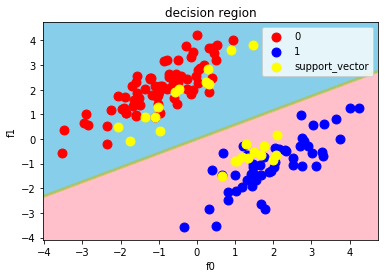

In [129]:
decision_region(X3_test, y3_test, model3)

## 学習率やループ回数に影響がありそうだが、おおよそ境界線の近くの特徴量が選ばれている

## 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。


「線形カーネルの式」

$$
k
(
x
i
,
x
j
)
=
x
T
i
x
j
$$
「多項式カーネルの式」

$$
k
(
x
i
,
x
j
)
=
(
γ
x
T
i
x
j
+
θ
0
)
d
$$

$\gamma$, $\theta_0$, $d$ はハイパーパラメータです。


線形カーネルは $\gamma = 1$, $\theta_0 = 0$, $d = 1$の場合の多項式カーネルと等しいと言えます。


## 4.SVMとはどのような仕組みか

スクラッチ実装に必要な情報は以上ですが、大まかな仕組みの解説を行います。


SVMは決定境界と近くの点の距離（マージン）を最大化する方法です。特徴量が2つであれば以下の図のように線を引くことを考えます。


https://diveintocode.gyazo.com/a5122026dd2f6c3065ad30bc703e1dbb


決定境界は線形であれば、線形回帰やロジスティック回帰と同様に次の式です。


y
(
x
)
=
w
T
x

$x$ : 特徴量ベクトル


$w$ : 重みベクトル


決定境界とある点 $x$ との距離 $r$ は以下の式で求められます。高校数学で学ぶ「点と直線の距離の公式」や「点と平面の距離の公式」を一般化したものです。


r
=
y
i
y
(
x
)
|
|
w
|
|
=
y
i
w
T
x
|
|
w
|
|

$||w||$ はベクトル $w$ の大きさで、特徴量が2つならば $||w|| = \sqrt{w_{1}^2+w_{2}^2}$ です。また、学習するi番目のデータのラベルを $y_{i}=-1$または$y_{i}=1$ としています。


訓練データの中で「最も距離 $r$ が短くなる点x（サポートベクター）の距離 $r$ を最大化する $w$ を求める」ことがSVMによる分類だと言い換えられます。


これは非常に複雑な問題です。 $w$ を変化させると、最も距離 $r$ が短くなる点x（サポートベクター）も変化していくからです。計算するためには、問題を扱いやすい形に変形させる必要があります。


扱いやすい形にする
まず定数 $M(>0)$ を置くと、先ほどの問題は、


「$\frac{M}{||w||}$ を $y_{i}(w^{T}x_{i})\geq M$ という条件の元で最大化する $w$ や $M$ を求める問題」


と表現できます。条件式は $x_{i}$ に訓練データの全ての点を入れて成り立つ必要があります。まだまだややこしいですが、これをMで割ってしまいます。そうすると、


「$\frac{1}{||w||}$ を $y_{i}(\frac{w^{T}}{M}x_{i})\geq 1$ という条件の元で最大化する $w$ や $M$ を求める問題」


になり、さらに $w^{T} \gets \frac{w^{T}}{M}$ と置き換えてしまいます。


そうすれば、


「 $\frac{1}{||w||}$ を $y_{i}(w^{T}X_{i})\geq 1$ という条件の元で最大化する $w$を求める問題」


まで簡単化できます。 $\frac{1}{||w||}$ を最大化するというのは $||w||$ を最小化することと同じです。これを後々さらに扱いやすくするために $\frac{1}{2}||w||^2$ を最小化すると考えます。よって、


「 $\frac{1}{2}||w||^2$ を $y_{i}(w^{T}x_{i})\geq 1$ という条件の元で最小化する $w$ を求める問題」


とすることができます。


解きやすい問題にする（双対化）
こういった不等式制約を持つ最適化問題は次のように ラグランジュの未定乗数法 で置き換えられることが知られています。


なお、このように難しい問題を別の簡単な問題に言い換えることを 双対化する といいます。


ラグランジュの未定乗数法を用いると以下のラグランジュ関数が得られます。


L
(
w
,
λ
)
=
1
2
|
|
w
|
|
2
−
N
∑
i
=
1
 
λ
i
{
y
i
(
w
T
x
i
)
−
1
}

$\lambda$ はラグランジュ乗数と呼ばれる数で、0以上の値です。これを $w$について微分し、0に等しいと置くと、次の式が得られます。


w
=
N
∑
i
=
1
 
λ
i
y
i
x
i

（この微分のために $||w||$ ではなく $\frac{1}{2}||w||^2$ としています）


これをラグランジュ関数に代入して整理すると


N
∑
i
=
1
 
λ
i
−
1
2
N
∑
i
=
1
  
N
∑
j
=
1
 
λ
i
λ
j
ｙ
i
ｙ
j
x
T
i
x
j

を $\lambda_{i} \geq 0$ かつ $\sum_{n=1}^{N}\lambda_{i}y_{i} = 0$ の条件の元で最大化するときの $\lambda_{i}$ を探す問題に双対化できます。


この形になれば、$\lambda$ を勾配降下法により求めることができます。$w$は出てきませんが、得られる結果は同じです。


カーネル
最後の式の $x_{i}^{T} x_j$ の部分を $k(x_i, x_j)$ という関数に置き換えます。この関数を カーネル関数 と呼びます。


N
∑
i
=
1
 
λ
i
−
1
2
N
∑
i
=
1
  
N
∑
j
=
1
 
λ
i
λ
j
ｙ
i
ｙ
j
k
(
x
i
,
x
j
)

この式が問題1の最急降下法の式の元になります。


カーネル関数は $x_{i}^{T} x_j$ ではない様々な計算に置き換えることができます。この部分を置き換えるだけで、元の特徴量を 高次元空間 に移動させたことと同じ結果が得られ、高い分類性能を得ることができます。これを カーネルトリック と呼びます。


高次元へ移す簡単な例
次の図のように1次元上に2色の点があるとします。これらを直線一本を引くことで分けることは不可能です。


https://diveintocode.gyazo.com/e75b3c8d2692afa9fba4f76485a883eb


しかし、例えば以下のように変換してみると直線でも分けられそうです。
$x^2=2.5$ あたりに線を引くことになります。


https://diveintocode.gyazo.com/5f5bacd8aac5831f1936759362b8a184


これは$x^2$を計算し、それを縦軸にプロットしたグラフです。1次元だったデータを $\phi(x)=x^2$ の関数により高次元（2次元）へと移動しました。


こういったことをSVMはカーネルトリックにより行います。